In [3]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold

In [83]:
## Import original csv file to have the categorical features with there names and not number
data=pd.read_csv('2009_Accidents_UK.csv',index_col='accident_index')
## Remove features already removed from pre-prcocessing step
data=data.drop(["accident_year",'accident_reference','date','time'],axis=1)
data

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
200901BS70001,524910.0,180800.0,-0.201349,51.512273,Metropolitan Police,Serious,2,1,Thursday,Kensington and Chelsea,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002882
200901BS70002,525050.0,181040.0,-0.199248,51.514399,Metropolitan Police,Serious,2,11,Monday,Kensington and Chelsea,...,Zebra,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002886
200901BS70003,526490.0,177990.0,-0.179599,51.486668,Metropolitan Police,Slight,2,1,Sunday,Kensington and Chelsea,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002912
200901BS70004,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Serious,2,1,Monday,Kensington and Chelsea,...,Pedestrian phase at traffic signal junction,Daylight,Other,Frost or ice,None,None,Urban,Yes,Non-trunk,E01002871
200901BS70005,526930.0,177490.0,-0.173445,51.482076,Metropolitan Police,Serious,2,1,Tuesday,Kensington and Chelsea,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009984148209,317240.0,576070.0,-3.297647,55.072192,Dumfries and Galloway,Serious,5,1,Tuesday,Dumfries and Galloway,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of range,-1
2009984148409,330500.0,568750.0,-3.088242,55.008460,Dumfries and Galloway,Serious,1,1,Sunday,Dumfries and Galloway,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2009984149109,319510.0,567470.0,-3.259680,54.995302,Dumfries and Galloway,Slight,1,1,Wednesday,Dumfries and Galloway,...,No physical crossing facilities within 50 metres,Daylight,Snowing + high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1


## Feature Extraction

### 1- Filtering Method
In this section we will be droping fixtures that has no relation to output and redundant/ duplicate features.
#### Domain Knowledge

In [37]:
## Location features

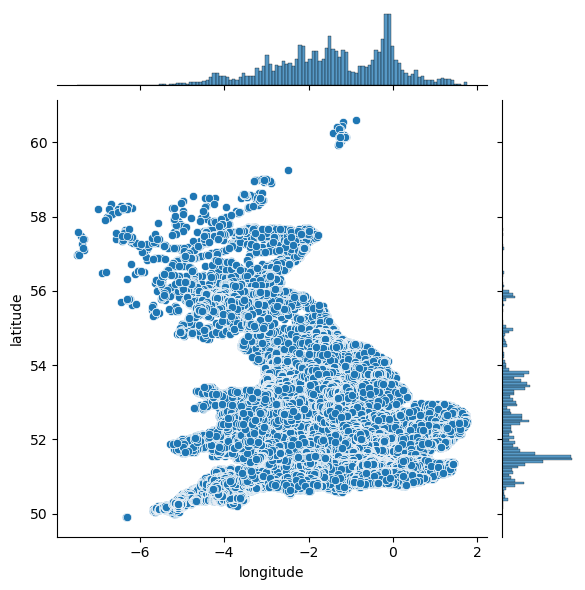

In [45]:
sns.jointplot(x='longitude',y='latitude',data=data)

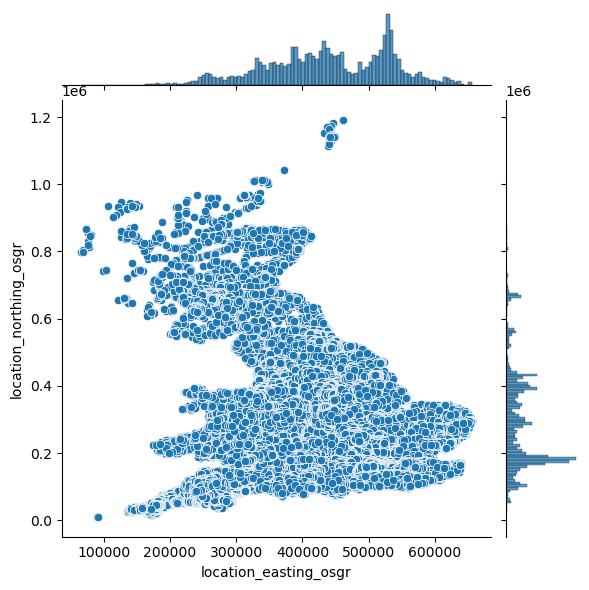

In [46]:
sns.jointplot(x='location_easting_osgr',y='location_northing_osgr',data=data)

In [36]:
## As shown in the plot location_easting_osgr and longitude are redundant, and northing_osgr and latitude are redundant.
## We will be removing one of both pairs
## Also, lsoa_of_accident_location will be removed

In [38]:
## Police force

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\express\.conda\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


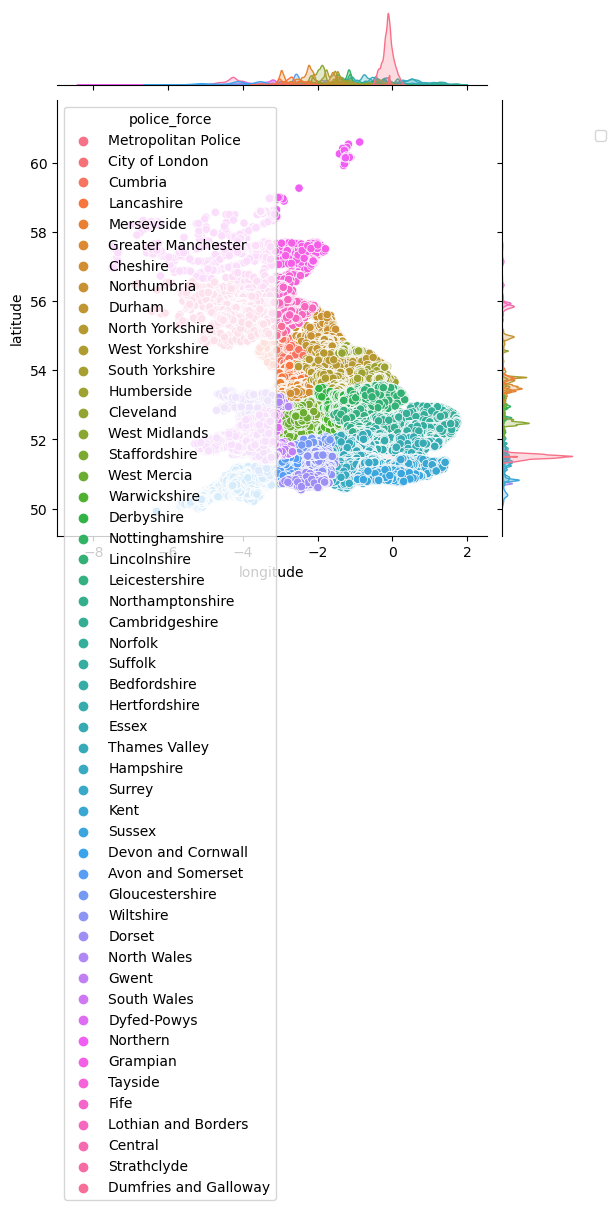

In [57]:
sns.jointplot(x='longitude', y='latitude', hue='police_force', data=data)
plt.legend(bbox_to_anchor=(1.5, 0.89), loc='lower right',ncol=3)

In [77]:
## Plot shows that the police force also is redudant as it is mainly based on location

<AxesSubplot:xlabel='police_force', ylabel='local_authority_highway'>

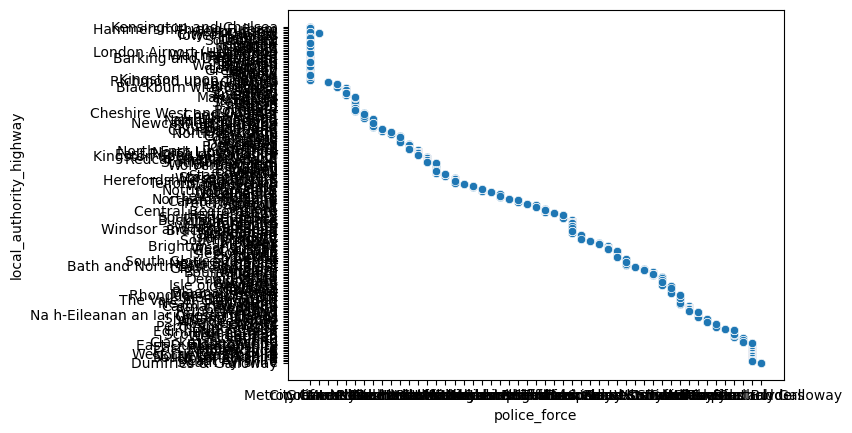

In [58]:
sns.scatterplot(data=data, x='police_force', y='local_authority_highway')

In [59]:
## Police force and local_authority_highway are almost the same so, the police_force will be kept and any other feature that is 
## related to location will be removed

In [60]:
## Dates and Times will be removed as they were replaced with IsWeekend amd IsRush respectively 

In [74]:
## Now lets test the results of our feature selection using a DT model

In [4]:
FSdata=pd.read_csv('preprocessed_UK_Accidents_2009_updated.csv')
# FSdata=FSdata.drop(['seasons_ranges','longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway','day_of_week'],axis=1)
FSdata=FSdata.drop(['seasons_ranges'],axis=1)
non_cat_cols=['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'number_of_vehicles', 'number_of_casualties',
       'speed_limit']
non_cat_df = FSdata[non_cat_cols]
scaler = StandardScaler()
non_cat_std = scaler.fit_transform(non_cat_df)
non_cat_std_df = pd.DataFrame(non_cat_std, columns=non_cat_cols)
FSdata[non_cat_cols] = non_cat_std_df[non_cat_cols]
FSdata=FSdata.drop('accident_index',axis=1)



In [79]:
## Before Feature Selection Dataframe

In [128]:
# Separate the target variable from the features
X = FSdata.drop('accident_severity', axis=1)
y = FSdata['accident_severity']

clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro')
print('F1 score:', np.mean(scores))

F1 score: 0.5309174189998344


In [75]:
## After Feature Selection Dataframe

In [222]:
# Separate the target variable from the features
X_fs = FSdata.drop('accident_severity', axis=1)
X_fs=X_fs.drop(['location_easting_osgr','location_northing_osgr'
                ,'longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway'
                ,'day_of_week'],axis=1)
y_fs = FSdata['accident_severity']
clf_fs = DecisionTreeClassifier()
scores = cross_val_score(clf_fs, X_fs, y_fs, cv=5, scoring='f1_micro')
print('F1 score:', np.mean(scores))

F1 score: 0.713638914816932


In [ ]:
## The results show that the feature selection made has improved the model performance significantly

#### Correlation Matrix
To use this the pre-processed data will be used as the catigorical data was converted to numbers 

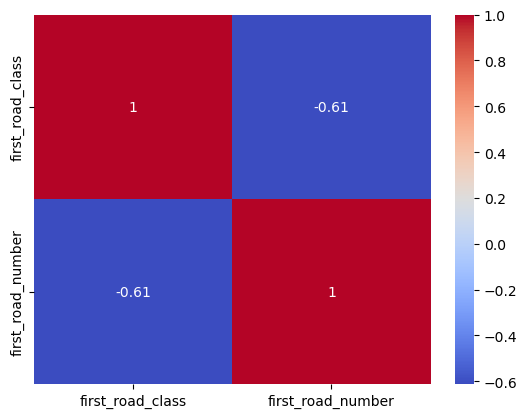

In [148]:
df = FSdata[['first_road_class','first_road_number']]
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

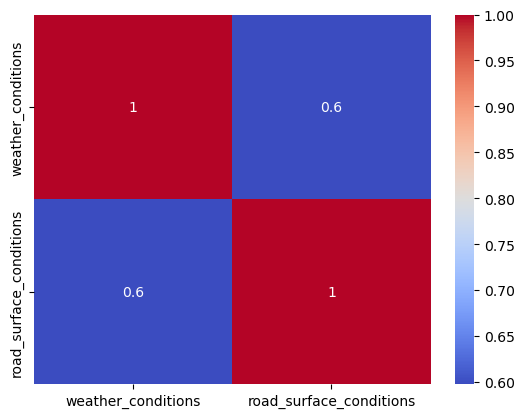

In [149]:
df = FSdata[['weather_conditions','road_surface_conditions']]
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [136]:
## These plot are some relations that we were not sure of their correlation using domain knowledge so we put the under test
## using correlation matrix. The matrix showed that theyre moderately correalated so we will further test them by dropping them
## and calculating the F1 score after dropping them

In [141]:
## Dropping weather_conditions
X_fs = FSdata.drop('accident_severity', axis=1)
X_fs=X_fs.drop(['location_easting_osgr','location_northing_osgr'
                ,'longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway'
                ,'day_of_week','weather_conditions'],axis=1)
y_fs = FSdata['accident_severity']
clf_fs = DecisionTreeClassifier()
scores = cross_val_score(clf_fs, X_fs, y_fs, cv=5, scoring='f1_micro')
print('F1 score:', np.mean(scores))

F1 score: 0.7144607175845116


In [142]:
## no difference

In [146]:
## Dropping first_road_number and second_road_number
X_fs = FSdata.drop('accident_severity', axis=1)
X_fs=X_fs.drop(['location_easting_osgr','location_northing_osgr'
                ,'longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway'
                ,'day_of_week','weather_conditions','weather_conditions','first_road_number','second_road_number'],axis=1)
y_fs = FSdata['accident_severity']
clf_fs = DecisionTreeClassifier()
scores = cross_val_score(clf_fs, X_fs, y_fs, cv=5, scoring='f1_micro')
print('F1 score:', np.mean(scores))

F1 score: 0.7142647419179795


In [147]:
## no difference. Therefore we will remove them to reduce computational time 

### Using Feature Importance 

In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import numpy as np
FSdata=pd.read_csv('preprocessed_UK_Accidents_2009_updated.csv')
# FSdata=FSdata.drop(['seasons_ranges','longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway','day_of_week'],axis=1)
FSdata=FSdata.drop(['seasons_ranges'],axis=1)
non_cat_cols=['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'number_of_vehicles', 'number_of_casualties',
       'speed_limit']
non_cat_df = FSdata[non_cat_cols]
scaler = StandardScaler()
non_cat_std = scaler.fit_transform(non_cat_df)
non_cat_std_df = pd.DataFrame(non_cat_std, columns=non_cat_cols)
FSdata[non_cat_cols] = non_cat_std_df[non_cat_cols]
FSdata=FSdata.drop('accident_index',axis=1)



# Separate the target variable from the features
X = FSdata.drop('accident_severity', axis=1)
y = FSdata['accident_severity']

# Create a decision tree classifier with default parameters
clf = DecisionTreeClassifier()

# Loop over different values of k and choose the best number of features
best_score = 0
best_k = None
best_features = None
for k in range(1, 40):
    # Compute feature importances
    clf.fit(X, y)
    importances = clf.feature_importances_

    # Select the top k features based on their importance
    top_k_features = np.argsort(importances)[::-1][:k]
    X_top_k = X.iloc[:, top_k_features]

    # Perform k-fold cross-validation with k=5 and compute the F1 score with micro-averaging
    scores = cross_val_score(clf, X_top_k, y, cv=5, scoring='f1_micro')
    mean_score = np.mean(scores)

    # Update the best score, k, and features if necessary
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
        best_features = X.columns[top_k_features]

# Print the best number of features and the corresponding mean cross-validation F1 score and feature names
print('Best number of features:', best_k)
print('Best mean cross-validation F1 micro score:', best_score)
print('Best features:', best_features.tolist())

Best number of features: 31
Best mean cross-validation F1 micro score: 0.5411896513951711
Best features: ['lsoa_of_accident_location', 'weeknumber', 'longitude', 'latitude', 'location_northing_osgr', 'location_easting_osgr', 'first_road_number', 'weekday', 'day_of_week', 'local_authority_district', 'local_authority_ons_district', 'junction_detail', 'local_authority_highway', 'number_of_vehicles', 'speed_limit', 'first_road_class', 'police_force', 'pedestrian_crossing_physical_facilities', 'seasons', 'weather_conditions', 'IsRush', 'second_road_number', 'road_type', 'light_conditions', 'second_road_class', 'road_surface_conditions', 'junction_control', 'urban_or_rural_area_Urban', 'special_conditions_at_site', 'number_of_casualties', 'did_police_officer_attend_scene_of_accident_No']


In [ ]:
## This method gave worse results, therefore we will not be using it

In [153]:
FSdata=pd.read_csv('preprocessed_UK_Accidents_2009_updated.csv')
# FSdata=FSdata.drop(['seasons_ranges','longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway','day_of_week'],axis=1)
FSdata=FSdata.drop(['seasons_ranges'],axis=1)
non_cat_cols=['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'number_of_vehicles', 'number_of_casualties',
       'speed_limit']
non_cat_df = FSdata[non_cat_cols]
scaler = StandardScaler()
non_cat_std = scaler.fit_transform(non_cat_df)
non_cat_std_df = pd.DataFrame(non_cat_std, columns=non_cat_cols)
FSdata[non_cat_cols] = non_cat_std_df[non_cat_cols]
FSdata=FSdata.drop('accident_index',axis=1)
FSdata=pd.read_csv('preprocessed_UK_Accidents_2009_updated.csv')
# FSdata=FSdata.drop(['seasons_ranges','longitude','latitude','lsoa_of_accident_location','police_force','local_authority_highway','day_of_week'],axis=1)
FSdata=FSdata.drop(['seasons_ranges'],axis=1)
non_cat_cols=['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'number_of_vehicles', 'number_of_casualties',
       'speed_limit']
non_cat_df = FSdata[non_cat_cols]
scaler = StandardScaler()
non_cat_std = scaler.fit_transform(non_cat_df)
non_cat_std_df = pd.DataFrame(non_cat_std, columns=non_cat_cols)
FSdata[non_cat_cols] = non_cat_std_df[non_cat_cols]
FSdata=FSdata.drop('accident_index',axis=1)
X = FSdata.drop('accident_severity', axis=1)
y = FSdata['accident_severity']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [206]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [207]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

11

In [208]:
corr_features

{'IsWeekend',
 'did_police_officer_attend_scene_of_accident_Yes',
 'latitude',
 'local_authority_highway',
 'local_authority_ons_district',
 'longitude',
 'pedestrian_crossing_human_control_None within 50 metres ',
 'seasons',
 'second_road_number',
 'urban_or_rural_area_Urban',
 'weekday'}

In [209]:
X.drop(corr_features,axis=1)


,location_easting_osgr,location_northing_osgr,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,first_road_class,first_road_number,road_type,...,special_conditions_at_site,carriageway_hazards,lsoa_of_accident_location,weeknumber,urban_or_rural_area_Rural,did_police_officer_attend_scene_of_accident_No,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,trunk_road_flag_Trunk (Roads managed by Highways England),IsRush
0,1.085983,-0.861414,29,0.338046,-0.559867,4,181,5,0,1,...,3,1,2460,1,0,0,0,0,1,False
1,1.087758,-0.859624,29,0.338046,1.786140,1,181,3,0,3,...,3,1,2464,2,0,0,0,0,1,False
2,1.106008,-0.882377,29,0.338046,-0.559867,7,181,0,934,3,...,3,1,2487,1,0,0,0,0,1,False
3,1.084589,-0.865144,29,0.338046,-0.559867,1,181,0,1299,3,...,3,1,2450,2,0,0,0,0,1,True
4,1.111585,-0.886106,29,0.338046,-0.559867,2,181,0,1048,3,...,3,1,2421,2,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158187,-1.546036,1.881859,11,1.987123,-0.559867,2,105,1,2973,0,...,3,1,27775,51,1,0,0,0,1,False
158188,-1.377978,1.881859,11,-1.311030,-0.559867,7,105,1,2973,4,...,3,1,27775,51,1,0,0,0,1,False
158189,-1.517266,1.881859,11,-1.311030,-0.559867,3,105,2,2955,3,...,3,1,27775,52,1,0,0,0,1,True
158190,-1.592030,1.881859,11,0.338046,-0.559867,1,105,0,2941,3,...,3,1,27775,52,1,0,0,0,1,False


In [210]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro')
print('F1 score:', np.mean(scores))

F1 score: 0.5400644312314139


In [229]:
## This method gave worse result, even when the threshold was changed from 0.7-.0.9, therefore we will not use it

In [241]:
from sklearn.linear_model import LogisticRegression

## Base model 
clf = LogisticRegression(random_state=42, solver='newton-cg',max_iter=1000)

# Fit the model to the training data
clf.fit(X_train_fs, y_train_fs)

# Predict the test labels
y_pred = clf.predict(X_test_fs)

# Compute the F1 score using the micro-average method
f1_score_micro = f1_score(y_test_fs, y_pred, average='micro')

# Predict the training labels
y_train_pred = clf.predict(X_train_fs)

# Compute the F1 score on the training set using the micro-average method
f1_score_micro_train = f1_score(y_train_fs, y_train_pred, average='micro')

# Print the F1 scores
print('F1 score (micro-average) on training set:', f1_score_micro_train)
print('F1 score (micro-average) on test set:', f1_score_micro)


C:\Users\express\.conda\envs\tensorflow\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\express\.conda\envs\tensorflow\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\express\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


F1 score (micro-average) on training set: 0.8521884111795058
F1 score (micro-average) on test set: 0.8491734884161952


In [ ]:
# Initialize a logistic regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear')##For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

# Define the parameter grid


# Initialize the grid search with cross-validation using k-fold CV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(lr_model, X_fs, y_fs, cv=skf, scoring='f1_micro')

print(' results:', results)

In [250]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Separate the target variable from the features
X = X_fs
y = y_fs

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


# Initialize a logistic regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, penalty='l2', C=1.0)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate the training and testing accuracy, recall, and precision
train_report = classification_report(y_train, y_train_pred,zero_division=1)
test_report = classification_report(y_test, y_test_pred,zero_division=1)

print('Training report:\n', train_report)
print('Testing report:\n', test_report)

Training report:
               precision    recall  f1-score   support

           1       0.85      1.00      0.92    107771
           2       1.00      0.00      0.00     17180
           3       1.00      0.00      0.00      1602

    accuracy                           0.85    126553
   macro avg       0.95      0.33      0.31    126553
weighted avg       0.87      0.85      0.78    126553

Testing report:
               precision    recall  f1-score   support

           1       0.85      1.00      0.92     26943
           2       1.00      0.00      0.00      4295
           3       1.00      0.00      0.00       401

    accuracy                           0.85     31639
   macro avg       0.95      0.33      0.31     31639
weighted avg       0.87      0.85      0.78     31639

